<a href="https://colab.research.google.com/github/wooellie/test/blob/main/TF_data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- 正在执行：第一步 - 加载并切分数据 ---


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.A92S2T_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.
--- 正在执行：第一步 - 可视化数据样本 ---


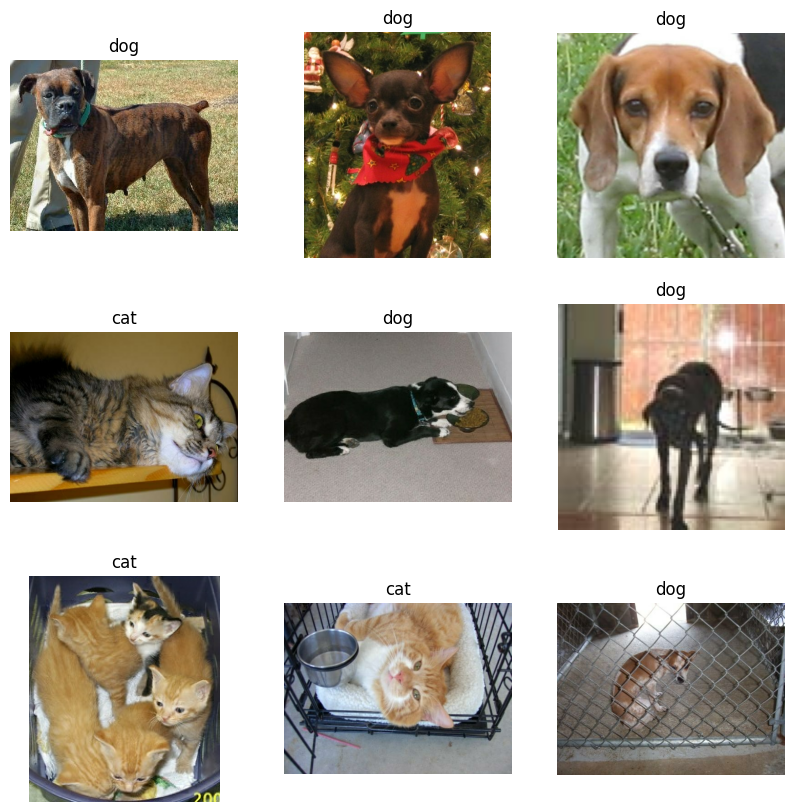

数据集中共有 2 个类别。
--- 正在执行：第二步 - 定义基础预处理策略 ---
--- 正在执行：第二步 - 定义数据增强策略 ---

--- 正在执行：第三步 - 构建数据管道 ---
数据管道构建完成。
--- 正在执行：第四步 - 构建模型 ---


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 118336)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     7,573,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,593,025 (28.97 MB)

 Trainable params: 7,593,025 (28.97 MB)

 Non-trainable params: 0 (0.00 B)


--- 正在执行：第四步 - 开始模型训练 ---
Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 978s 2s/step - accuracy: 0.5921 - loss: 0.7237 - val_accuracy: 0.6552 - val_loss: 0.6185
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 970s 2s/step - accuracy: 0.6759 - loss: 0.5971 - val_accuracy: 0.7502 - val_loss: 0.5265
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 958s 2s/step - accuracy: 0.7105 - loss: 0.5641 - val_accuracy: 0.7390 - val_loss: 0.5377
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 941s 2s/step - accuracy: 0.7179 - loss: 0.5547 - val_accuracy: 0.7317 - val_loss: 0.5362
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 961s 2s/step - accuracy: 0.7289 - loss: 0.5321 - val_accuracy: 0.7597 - val_loss: 0.4877
模型训练完成。


In [1]:
# -*- coding: utf-8 -*-

"""
通用图像增强任务代码框架
================================
本代码框架遵循一个标准的、高效的四步逻辑流程，用于完成一个包含数据增强的图像分类任务。
1. 准备阶段：加载并探索数据。
2. 策略定义：定义基础预处理和数据增强的操作。
3. 管道构建：使用 tf.data 构建高效的数据输入管道。
4. 模型训练：构建、编译并训练模型。
"""

# 代码块：导入所有必需的库
# 功能：为整个项目准备好所需的编程工具。
# 输入：无。
# 输出：导入的库模块，如 tf, layers, np 等，可供后续代码使用。
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# ==============================================================================
# 第一步：准备阶段 (Data Preparation)
# ==============================================================================


# 代码块：加载并探索原始数据
# 功能：从 tensorflow_datasets 中加载指定的数据集，并将其切分为训练、验证和测试集。
# 输入：数据集名称 (如 'cats_vs_dogs') 和切分比例。
# 输出：三个 tf.data.Dataset 对象 (train_dataset, validation_dataset, test_dataset) 和一个元数据对象 (metadata)。
def load_and_split_data(dataset_name="cats_vs_dogs"):
    """加载并切分数据集。"""
    print("--- 正在执行：第一步 - 加载并切分数据 ---")
    # tfds.load 函数执行加载和切分操作。
    (train_dataset, validation_dataset, test_dataset), metadata = tfds.load(
        dataset_name,
        split=["train[:80%]", "train[80%:90%]", "train[90%:]"],  # 它将 'train' 数据按比例切分。
        with_info=True,  # 它同时加载数据集的元数据。
        as_supervised=True,  # 它将数据格式化为 (图像, 标签) 对。
    )
    # 函数返回切分好的数据集和元数据。
    return train_dataset, validation_dataset, test_dataset, metadata


# 代码块：可视化数据样本
# 功能：从数据集中随机抽取一些图像及其标签进行显示，以直观地检查数据质量。
# 输入：一个 tf.data.Dataset 对象 (dataset) 和元数据对象 (metadata)。
# 输出：一个显示了图像和标签的 Matplotlib 图表。
def visualize_samples(dataset, metadata):
    """可视化数据集中的一些样本。"""
    print("--- 正在执行：第一步 - 可视化数据样本 ---")
    # plt.figure 函数创建一个新的图窗（画布）。
    plt.figure(figsize=(10, 10))
    # 元数据对象 (metadata) 创建一个从整数标签到字符串名称的转换器。
    get_label_name = metadata.features["label"].int2str
    # 数据集对象 (dataset) 调用 .take(9) 方法，从中取出9个样本。
    for i, (image, label) in enumerate(dataset.take(9)):
        # plt.subplot 函数在3x3的网格中创建一个子图区域。
        ax = plt.subplot(3, 3, i + 1)
        # plt.imshow 函数将图像数据显示在子图上。
        plt.imshow(image)
        # plt.title 函数使用标签转换器设置子图的标题。
        plt.title(get_label_name(label))
        # plt.axis 函数关闭坐标轴显示。
        plt.axis("off")
    # plt.show 函数最终显示整个图窗。
    plt.show()


# ==============================================================================
# 第二步：定义处理策略 (Strategy Definition)
# ==============================================================================


# 代码块：定义基础预处理层
# 功能：创建一个 Keras 层，该层包含所有数据都必须执行的确定性操作（尺寸调整和归一化）。
# 输入：目标图像尺寸 (image_size)。
# 输出：一个包含预处理逻辑的 tf.keras.Sequential 对象。
def define_preprocessing_layer(image_size):
    """定义尺寸调整和归一化层。"""
    print("--- 正在执行：第二步 - 定义基础预处理策略 ---")
    # keras.Sequential 类创建一个序列化的容器。
    resizing_and_rescaling_layer = Sequential(
        [
            layers.Resizing(
                image_size[0], image_size[1]
            ),  # 该容器添加一个 Resizing 层，用于统一图像尺寸。
            layers.Rescaling(
                1.0 / 255
            ),  # 该容器继续添加一个 Rescaling 层，用于将像素值归一化到 [0,1] 区间。
        ]
    )
    # 函数返回这个预处理层。
    return resizing_and_rescaling_layer


# 代码块：定义数据增强层
# 功能：创建一个 Keras 层，该层包含一系列随机的、仅用于训练数据的图像变换操作。
# 输入：无。
# 输出：一个包含数据增强逻辑的 tf.keras.Sequential 对象。
def define_augmentation_layer():
    """定义数据增强层。"""
    print("--- 正在执行：第二步 - 定义数据增强策略 ---")
    # keras.Sequential 类创建另一个序列化的容器。
    data_augmentation_layer = Sequential(
        [
            layers.RandomFlip("horizontal"),  # 该容器添加一个随机水平翻转层。
            layers.RandomRotation(0.2),  # 该容器添加一个随机旋转层。
            layers.RandomZoom(0.2),  # 该容器添加一个随机缩放层。
        ]
    )
    # 函数返回这个增强层。
    return data_augmentation_layer


# ==============================================================================
# 第三步：构建数据输入管道 (Pipeline Construction)
# ==============================================================================


# 代码块：创建高效的数据管道
# 功能：将预处理、打乱、批处理、数据增强和性能预取等操作封装成一个函数，用于处理数据集。
# 输入：
#   - dataset: 原始的 tf.data.Dataset 对象。
#   - batch_size: 批处理大小。
#   - resizing_layer: 第二步中定义的基础预处理层。
#   - augmentation_layer: 第二步中定义的数据增强层。
#   - shuffle:布尔值，是否打乱数据（通常对训练集为True）。
#   - augment: 布尔值，是否应用数据增强（通常对训练集为True）。
# 输出：一个经过完整处理、可直接输入模型的 tf.data.Dataset 对象。
def create_data_pipeline(
    dataset, batch_size, resizing_layer, augmentation_layer=None, shuffle=False, augment=False
):
    """为给定的数据集构建一个高效的数据管道。"""
    # AUTOTUNE 变量让 TensorFlow 自动决定并行处理的最佳线程数。
    AUTOTUNE = tf.data.AUTOTUNE

    # 数据集 (dataset) 调用 .map() 方法，将 resizing_layer 应用于每个元素。
    dataset = dataset.map(lambda x, y: (resizing_layer(x), y), num_parallel_calls=AUTOTUNE)

    if shuffle:
        # 数据集 (dataset) 调用 .shuffle() 方法，打乱其元素的顺序。
        dataset = dataset.shuffle(buffer_size=1000)

    # 数据集 (dataset) 调用 .batch() 方法，将元素打包成批次。
    dataset = dataset.batch(batch_size)

    if augment and augmentation_layer:
        # 数据集 (dataset) 再次调用 .map() 方法，将 augmentation_layer 应用于每个批次。
        dataset = dataset.map(
            lambda x, y: (augmentation_layer(x, training=True), y), num_parallel_calls=AUTOTUNE
        )

    # 数据集 (dataset) 调用 .prefetch() 方法，在后台预取数据以提升性能。
    # 函数返回最终处理好的数据集管道。
    return dataset.prefetch(buffer_size=AUTOTUNE)


# ==============================================================================
# 第四步：模型构建与训练 (Model & Training)
# ==============================================================================


# 代码块：构建卷积神经网络 (CNN) 模型
# 功能：创建一个不包含预处理和增强层的标准 CNN 模型。
# 输入：
#   - image_size: 图像尺寸，用于确定输入形状。
#   - num_classes: 数据集的类别总数，用于确定输出层神经元数量。
# 输出：一个编译前的 tf.keras.Model 对象。
def build_model(image_size, num_classes):
    """构建一个用于图像分类的CNN模型。"""
    print("--- 正在执行：第四步 - 构建模型 ---")
    # keras.Sequential 类创建一个模型容器。
    model = Sequential(
        [
            # 容器接收一个 Input 层来定义模型的输入形状。
            layers.Input(shape=(image_size[0], image_size[1], 3)),
            # 容器添加一个卷积层。
            layers.Conv2D(32, (3, 3), activation="relu"),
            # 容器添加一个最大池化层。
            layers.MaxPooling2D((2, 2)),
            # 容器添加第二个卷积层。
            layers.Conv2D(64, (3, 3), activation="relu"),
            # 容器添加第二个最大池化层。
            layers.MaxPooling2D((2, 2)),
            # 容器添加一个展平层，将特征图转换为一维向量。
            layers.Flatten(),
            # 容器添加一个全连接层。
            layers.Dense(64, activation="relu"),
            # 容器添加最终的输出层，神经元数量等于类别数。
            # 注意：如果 num_classes=2，通常使用1个神经元和 'sigmoid' 激活函数。
            # 如果 num_classes > 2，使用 num_classes 个神经元和 'softmax' 激活函数。
            layers.Dense(
                num_classes if num_classes > 2 else 1,
                activation="sigmoid" if num_classes == 2 else "softmax",
            ),
        ]
    )
    # 函数返回构建好的模型。
    return model


# 代码块：主执行函数
# 功能：协调整个流程，按顺序执行所有步骤。
# 输入：无。
# 输出：训练好的模型和训练历史。
def main():
    """主执行函数。"""
    # 定义超参数
    IMAGE_SIZE = (180, 180)
    BATCH_SIZE = 32
    EPOCHS = 5

    # === 第一步：准备阶段 ===
    train_raw, validation_raw, test_raw, metadata = load_and_split_data()
    visualize_samples(train_raw, metadata)
    num_classes = metadata.features["label"].num_classes
    print(f"数据集中共有 {num_classes} 个类别。")

    # === 第二步：定义处理策略 ===
    resizing_and_rescaling_layer = define_preprocessing_layer(IMAGE_SIZE)
    data_augmentation_layer = define_augmentation_layer()

    # === 第三步：构建数据输入管道 ===
    print("\n--- 正在执行：第三步 - 构建数据管道 ---")
    train_pipeline = create_data_pipeline(
        train_raw,
        BATCH_SIZE,
        resizing_and_rescaling_layer,
        data_augmentation_layer,
        shuffle=True,
        augment=True,
    )
    validation_pipeline = create_data_pipeline(
        validation_raw, BATCH_SIZE, resizing_and_rescaling_layer
    )
    test_pipeline = create_data_pipeline(test_raw, BATCH_SIZE, resizing_and_rescaling_layer)
    print("数据管道构建完成。")

    # === 第四步：模型构建与训练 ===
    model = build_model(IMAGE_SIZE, num_classes)

    # 模型对象 (model) 调用 .compile() 方法，配置其学习过程。
    model.compile(
        optimizer="adam",  # 它指定 'adam' 为优化器。
        loss=tf.keras.losses.BinaryCrossentropy()
        if num_classes == 2
        else tf.keras.losses.SparseCategoricalCrossentropy(),  # 它根据类别数选择合适的损失函数。
        metrics=["accuracy"],  # 它指定 'accuracy' 作为监控指标。
    )
    # 模型对象 (model) 调用 .summary() 方法，打印出模型的结构。
    model.summary()

    print("\n--- 正在执行：第四步 - 开始模型训练 ---")
    # 模型对象 (model) 调用 .fit() 方法，使用准备好的数据管道开始训练。
    history = model.fit(train_pipeline, validation_data=validation_pipeline, epochs=EPOCHS)
    print("模型训练完成。")

    # 函数返回训练好的模型和历史记录。
    return model, history


if __name__ == "__main__":
    # 当脚本被直接运行时，调用 main 函数。
    trained_model, training_history = main()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')